# Practical session 1
>  - María Castro
>  - Jorge Martín
>  - Miguel Angel Rojas


## Import library

In [197]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas_profiling
from datetime import datetime

fdata2 = pd.DataFrame() #creates a new dataframe that's empty
#fdata2 = fdata2.append(oldDF, ignore_index = True) # ignoring index is optional
# try printing some data from newDF
#print(fdata2.head()) #again optional 

## Functions

In [161]:
def read(file_name, fheader, fletter, ftrial):
    global fdata2
    fsadl1 = pd.read_csv(file_name, sep=';', decimal=',', names=fheader, header=None)
    fsadl1['muestra'] = fletter
    fsadl1['trial'] = ftrial
    fdata = fsadl1.iloc[:, :96] 
    
    # Merge them
    
    
    flabels = fsadl1.iloc[:,96]
    ## Preprocessing data
    #find and remove rows with all nulls
    fidx=fdata.index[fdata.isnull().all(1)] #1 is the axis for rows
    #select data not in idx, that is data that is not all null
    fdata = fdata[~fdata.index.isin(fidx)] 
    #same for labels
    flabels = flabels[~flabels.index.isin(fidx)]

    #see how many there are of each label
    #what does it mean ?
    flabels.value_counts()


    #fill missing values
    fdata = fdata.fillna(method='ffill',axis=1)
    fdata2 = pd.concat([fdata2, fdata], axis=0)


    
    return fdata2, flabels


In [162]:
def num_to_letter(number):
    switcher = {
        1: "A",
        2: "C",
        3: "L",
        4: "M",
        5: "O",
        6: "U"
    }
    return switcher.get(number, "Invalid month")

In [163]:
#separate train and test train_test_split function' 
def train_test_split_local(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    train_test_split(y, shuffle=False)
    return X_train, X_test, y_train, y_test

In [164]:
def plot_confusion_matrix(cm, names, title='MATRIZ DE CONFUSIÓN', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')

In [195]:
all_features_1S = windowing(data, 1000, '1S', 500, labels, 11)

def windowing(fdata, window_number, window_text, porcentage, flabels, frol):
    ffiltered_data = fdata[columns].rolling(frol).median()
    ffiltered_data['fecha'] = fdata.fecha


    # Windowing and Feature Extraction
    ffiltered_data['time']=pd.to_datetime(fdata.fecha,unit='ms')
    ffiltered_data.index=ffiltered_data.time
    #calculate mean over a 1 second window
    keep = ffiltered_data.time.dt.microsecond/window_number %porcentage
    keep = keep - keep.shift() < 0

    means = ffiltered_data[columns].rolling(window_text).mean()[keep]
    means.columns = [str(col) + '_mean' for col in means.columns]
    variances = ffiltered_data[columns].rolling(window_text).var()[keep]
    variances.columns = [str(col) + '_var' for col in variances.columns]

    #talk about apply function
    flabels.index = ffiltered_data.time
    mode_labels = flabels.rolling(window_text).apply(lambda x:mode(x)[0])[keep]

    #all features
    fall_features = pd.concat([means, variances],axis=1)
    fall_features['muestra'] = mode_labels
    #fall_features['user'] = user
    #fall_features['trial'] = trial
    
    return fall_features

## Execises definitions and clasifiers


In [177]:
def excercise_1 (fall_data, estimators):
    # Exercise 1
    # Random train test split

    # Labels are the values we want to predict
    labels = np.array(fall_data['muestra'])

    # Remove the labels from the features
    # axis 1 refers to the columns
    features = fall_data.drop('muestra', axis = 1)
    features = features.drop('fecha', axis = 1)
    features = features.drop('vacio', axis = 1)


    # Saving feature names for later use
    feature_list = list(features.columns)

    # Convert to numpy array
    features = np.array(features)


    X_train, X_test, y_train, y_test = train_test_split_local(features, labels)

    print('X_train:', X_train.shape)
    print('X_test:', X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:', y_test.shape)


    classifier = RandomForestClassifier(n_estimators=estimators, random_state=0)  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test)
    
    labels = ["A","C","L","M","O","U"]

    print("\n _______________________________________________________")  
    print("confusion matrix: \n")  
    print(confusion_matrix(y_test,y_pred))  
    print("\n _______________________________________________________")  
    print("classification report: \n")  
    print(classification_report(y_test,y_pred))  
    print("_______________________________________________________")  
    print("accuracy score: " + str(accuracy_score(y_test, y_pred)))  

    
    plt.figure(figsize=(15,8))
    plot_confusion_matrix(confusion_matrix(y_test,y_pred), labels)

def excercise_2 (fall_data, estimators):
    # Excercise 2
    # user 1 2 3 train test 4

    # Labels are the values we want to predict
    # Remove the labels from the features
    # axis 1 refers to the columns

    user123 = fall_data[fall_data['user'].isin([1, 2, 3])]
    user4 = fall_data[fall_data['user'].isin([4])]


    y_train_2 = np.array(user123['label'])
    y_test_2 = np.array(user4['label'])

    user123 = user123.drop('label', axis = 1)
    user123 = user123.drop('user', axis = 1)
    user123 = user123.drop('trial', axis = 1)

    user4 = user4.drop('label', axis = 1)
    user4 = user4.drop('user', axis = 1)
    user4 = user4.drop('trial', axis = 1)

    X_train_2 = np.array(user123)
    X_test_2 = np.array(user4)
    print('X_train_2:', X_train_2.shape)
    print('X_test_2:', X_test_2.shape)
    print('y_train_2:', y_train_2.shape)
    print('y_test_2:', y_test_2.shape)


    classifier2 = RandomForestClassifier(n_estimators=estimators, random_state=0)  
    classifier2.fit(X_train_2, y_train_2)  
    y_pred_2 = classifier2.predict(X_test_2)

    print("\n _______________________________________________________")  
    print("confusion matrix: \n")  
    print(confusion_matrix(y_test_2,y_pred_2))  
    print("\n _______________________________________________________")  
    print("classification report: \n")  
    print(classification_report(y_test_2,y_pred_2))  
    print("_______________________________________________________")  
    print("accuracy score: " +str(accuracy_score(y_test_2, y_pred_2)))

    labels = [0,1,2,4,5]
    plt.figure(figsize=(15,8))
    plot_confusion_matrix(confusion_matrix(y_test_2,y_pred_2), labels)

def excercise_3 (fall_data, estimators):  
    # Excercise 3
    #  1,2,3 and drill session as training data and trials 4 and 5 as test data.

    # Labels are the values we want to predict
    # Remove the labels from the features
    # axis 1 refers to the columns

    trial1236 = fall_data[fall_data['trial'].isin([1, 2, 3, 6])]
    trial45 = fall_data[fall_data['trial'].isin([4, 5])]

    y_train_3 = np.array(trial1236['label'])
    y_test_3 = np.array(trial45['label'])

    trial1236 = trial1236.drop('label', axis = 1)
    trial1236 = trial1236.drop('user', axis = 1)
    trial1236 = trial1236.drop('trial', axis = 1)

    trial45 = trial45.drop('label', axis = 1)
    trial45 = trial45.drop('user', axis = 1)
    trial45 = trial45.drop('trial', axis = 1)

    X_train_3 = np.array(trial1236)
    X_test_3 = np.array(trial45)

    print('X_train_3:', X_train_3.shape)
    print('X_test_3:', X_test_3.shape)
    print('y_train_3:', y_train_3.shape)
    print('y_test_3:', y_test_3.shape)


    classifier = RandomForestClassifier(n_estimators=estimators, random_state=0)  
    classifier.fit(X_train_3, y_train_3)  
    y_pred_3 = classifier.predict(X_test_3)


    print("\n _______________________________________________________")  
    print("confusion matrix: \n")  
    print(confusion_matrix(y_test_3,y_pred_3))  
    print("\n _______________________________________________________")  
    print("classification report: \n")  
    print(classification_report(y_test_3,y_pred_3))  
    print("_______________________________________________________")  
    print("accuracy score: " + str(accuracy_score(y_test_3, y_pred_3)))

    labels = [0,1,2,4,5]
    plt.figure(figsize=(15,8))
    plot_confusion_matrix(confusion_matrix(y_test_3,y_pred_3), labels)

## Read data

In [180]:

path = 'dataset-proyecto/' #enter thepath for the dataset folder
header_path = 'header-proy.csv' #enter the path for the header file
header=pd.read_csv(header_path,names=['column',''],sep=';', decimal=',')['column'].values
num_letters = range(1,7)
trials = range(1,6)
users=range(2,6)
all_data_1S = pd.DataFrame()


In [181]:
for num_letter in num_letters:
    letter = num_to_letter(num_letter)
    for user in users:
        for trial in trials:
            file_name = path+str(letter)+'-'+str(user)+'-'+str(trial)+'.csv'
            data, labels = read(file_name, header, letter, trial)
            #columns = data.columns[~data.columns.isin(['letter', 'trial','tiempo'])]
       
        #we use a window of 11 elements
        # Filtering using median filter
        
        #all_features_1S = windowing(data, 1000, '1S', 500, labels, 11)
        #all_data_1S = pd.concat([all_data_1S, all_features_1S])
#data=data.drop(['x','x.1','x.2','x.3','x.4','x.5','x.6','x.7','x.8','x.9','x.10','x.11','x.12','x.13','x.14'], axis = 1)
 


In [194]:
#data.describe()


data['fecha'] = pd.to_datetime(data['fecha'], format='%H.%M.%S.%f', errors='ignore')

In [196]:

all_features_1S = windowing(data, 1000, '1S', 500, labels, 11)
all_features_1S.describe()

TypeError: cannot handle this type -> object

## Exploratory data analysis

In [169]:
data.describe()

,muestra,fecha,vacio,ref x,ref y,ref z,x,y,z,ro,...,z.13,ro.13,theta.13,phi.13,x.14,y.14,z.14,ro.14,theta.14,phi.14
count,88292,88292,88292,88292.0,88292.0,88292.0,88292.0,88292.0,88292.0,88292.0,...,88292.0,88292.00000,88292.00000,88292.0000,88292.0,88292.0,88292.0,88292.00000,88292.00000,88292.0000
unique,6,87246,87246,70093.0,55786.0,67426.0,67400.0,54024.0,64809.0,3414.0,...,67677.0,3459.00000,3475.00000,3459.0000,70236.0,56934.0,67676.0,3466.00000,3467.00000,3465.0000
top,A,12.33.14.156006,12.33.14.156006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.11127,98.84306,303.9508,0.0,0.0,0.0,3.11127,98.84306,303.9508
freq,19456,2,2,9059.0,9059.0,9059.0,11786.0,11788.0,11786.0,84704.0,...,8930.0,84704.00000,84704.00000,84704.0000,8930.0,8930.0,8930.0,84704.00000,84704.00000,84704.0000


In [170]:
%matplotlib inline

In [192]:
data.dtypes

muestra             object
fecha       datetime64[ns]
vacio               object
ref x               object
ref y               object
ref z               object
x                   object
y                   object
z                   object
ro                  object
theta               object
phi                 object
x.1                 object
y.1                 object
z.1                 object
ro.1                object
theta.1             object
phi.1               object
x.2                 object
y.2                 object
z.2                 object
ro.2                object
theta.2             object
phi.2               object
x.3                 object
y.3                 object
z.3                 object
ro.3                object
theta.3             object
phi.3               object
                 ...      
x.10                object
y.10                object
z.10                object
ro.10               object
theta.10            object
phi.10              object
x

In [193]:
data.head()

,muestra,fecha,vacio,ref x,ref y,ref z,x,y,z,ro,...,z.13,ro.13,theta.13,phi.13,x.14,y.14,z.14,ro.14,theta.14,phi.14
0,A,1900-01-01 11:48:07.884522,11.48.07.884522,0,0,0,0,0,0,0,...,0,3.11127,98.8431,303.951,0,0,0,3.11127,98.8431,303.951
1,A,1900-01-01 11:48:08.031439,11.48.08.031439,0,0,0,0,0,0,0,...,0,3.11127,98.8431,303.951,0,0,0,3.11127,98.8431,303.951
2,A,1900-01-01 11:48:08.041431,11.48.08.041431,0,0,0,0,0,0,0,...,0,3.11127,98.8431,303.951,0,0,0,3.11127,98.8431,303.951
3,A,1900-01-01 11:48:08.069415,11.48.08.069415,0,0,0,0,0,0,0,...,0,3.11127,98.8431,303.951,0,0,0,3.11127,98.8431,303.951
4,A,1900-01-01 11:48:08.080410,11.48.08.080410,0,0,0,0,0,0,0,...,0,3.11127,98.8431,303.951,0,0,0,3.11127,98.8431,303.951


In [172]:
pandas_profiling.ProfileReport(data)

Number of variables,97
Number of observations,88292
Total Missing (%),0.0%
Total size in memory,65.3 MiB
Average record size in memory,776.0 B
Numeric,94
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


LinAlgError: singular matrix

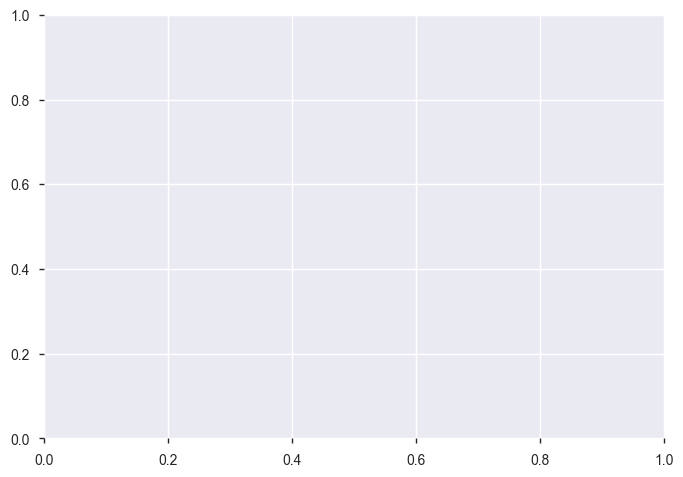

In [175]:
"""#separate by class, see feature mean
all_data_1S_0 = data[data.muestra=="A"]
all_data_1S_1 = data[data.muestra=="C"]
all_data_1S_2 = data[data.muestra=="L"]
all_data_1S_3 = data[data.muestra=="M"]
all_data_1S_4 = data[data.muestra=="0"]
all_data_1S_5 = data[data.muestra=="U"]


draw_col = 10
sns.distplot(all_data_1S_0.iloc[:,draw_col], hist=False, kde=True, color='red')
sns.distplot(all_data_1S_1.iloc[:,draw_col], hist=False, kde=True, color='green')
sns.distplot(all_data_1S_2.iloc[:,draw_col], hist=False, kde=True, color='yellow')
sns.distplot(all_data_1S_4.iloc[:,draw_col], hist=False, kde=True, color='blue')
sns.distplot(all_data_1S_5.iloc[:,draw_col], hist=False, kde=True, color='black')"""

## Metrics

#############################
X_train: (59155, 93)
X_test: (29137, 93)
y_train: (59155,)
y_test: (29137,)

 _______________________________________________________
confusion matrix: 

[[5752   17   13  546   10   18]
 [   9 3426    4  485   13   10]
 [  11   15 4937  605   11   31]
 [   8    9   10 4654   14   10]
 [  18   14    5  400 3446   10]
 [   8    5   25  391    6 4191]]

 _______________________________________________________
classification report: 

              precision    recall  f1-score   support

           A       0.99      0.90      0.95      6356
           C       0.98      0.87      0.92      3947
           L       0.99      0.88      0.93      5610
           M       0.66      0.99      0.79      4705
           O       0.98      0.89      0.93      3893
           U       0.98      0.91      0.94      4626

   micro avg       0.91      0.91      0.91     29137
   macro avg       0.93      0.91      0.91     29137
weighted avg       0.93      0.91      0.91   

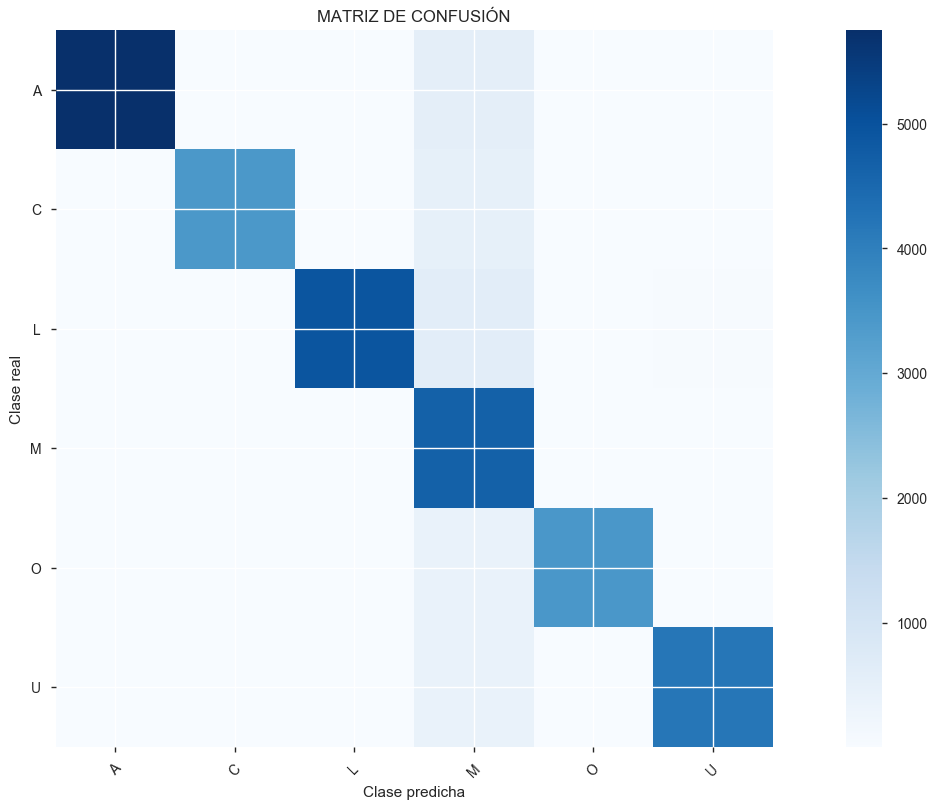

In [178]:
print("#############################")
excercise_1(data, 50)

# Conclusions:

### According precision and recall metrics, the best answer are with method 1 , where training and test data are taken radomly, by the way the best results appear when the time analyzed is 10 seconds , probably because the activities sequence going the best results over a longer time. 

### Maybe this metric would be reduced if you take more than 10 seconds or as it`s showing in this report you can reduce the effectiveness if you take a litlle less bit time as well.

### If only one place could be selected to put the senssor according to the correlation matrix I would place it on back, which one has a highest level of correlation with other variables (related with acelerometer and innertian) an then this one can give me reliable information , but that would be useful for this analysis. 


### If the smartphone changed it´s orientation , I suposse the answers of this study doesn´t change , because the sensors of the smartphone (accelerometer, gyroscope, magnetometer), can tell you the position of the phone.